In [1]:
from utils.helper import Helper
from neural_net import build_and_train
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
from matplotlib import cm

In [2]:
h = Helper('topomaps_1vs3/train/combined', 'topomaps_1vs3/test/combined')

In [3]:
best_space_model = h.load_best_hyperspace()

In [4]:
best_space_model

{'activation': 'relu',
 'batch_size': 70.0,
 'conv_dropout_drop_proba': 0.2319040800996359,
 'conv_hiddn_units_mult': 0.7004255447579512,
 'conv_kernel_size': 3.0,
 'conv_pool_res_start_idx': 2.0,
 'epochs': 180.0,
 'fc_dropout_drop_proba': 0.17590859742643258,
 'fc_units_1_mult': 0.9697958299395057,
 'first_conv': None,
 'l2_weight_reg_mult': 3.3401336643592123,
 'lr_rate_mult': 0.6582150163080535,
 'nb_conv_pool_layers': 2,
 'one_more_fc': 1.1848111467718283,
 'optimizer': 'Adam',
 'pooling_type': 'inception',
 'res_conv_kernel_size': 3.0,
 'residual': None,
 'use_BN': True}

In [5]:
model, model_name, results, log_path = build_and_train(
        best_space_model,
        save_best_weights=True,
        log_for_tensorboard=True
    )

Found 40000 images belonging to 2 classes.
Found 10000 images belonging to 2 classes.
Hyperspace:
{'activation': 'relu', 'batch_size': 70.0, 'conv_dropout_drop_proba': 0.2319040800996359, 'conv_hiddn_units_mult': 0.7004255447579512, 'conv_kernel_size': 3.0, 'conv_pool_res_start_idx': 2.0, 'epochs': 180.0, 'fc_dropout_drop_proba': 0.17590859742643258, 'fc_units_1_mult': 0.9697958299395057, 'first_conv': None, 'l2_weight_reg_mult': 3.3401336643592123, 'lr_rate_mult': 0.6582150163080535, 'nb_conv_pool_layers': 2, 'one_more_fc': 1.1848111467718283, 'optimizer': 'Adam', 'pooling_type': 'inception', 'res_conv_kernel_size': 3.0, 'residual': None, 'use_BN': True}
0
28
(None, 128, 128, 3)
(None, 128, 128, 28)
(None, 64, 64, 36)
1
56
(None, 64, 64, 36)
(None, 64, 64, 56)
(None, 32, 32, 69)
(None, 70656)
(None, 969)
(None, 888)
Model's weights will be saved to: weights/940a3.hdf5
Tensorboard log files will be saved to: TensorBoard/940a3
Epoch 1/180
572/572 [==============================] - 143s 

572/572 [==============================] - 149s 260ms/step - loss: 0.4943 - accuracy: 0.9076 - val_loss: 0.6728 - val_accuracy: 0.8307
Epoch 51/180
572/572 [==============================] - 140s 245ms/step - loss: 0.4865 - accuracy: 0.9094 - val_loss: 0.6710 - val_accuracy: 0.8299
Epoch 52/180
572/572 [==============================] - 138s 241ms/step - loss: 0.4803 - accuracy: 0.9129 - val_loss: 0.6714 - val_accuracy: 0.8300
Epoch 53/180
572/572 [==============================] - 140s 245ms/step - loss: 0.4712 - accuracy: 0.9176 - val_loss: 0.6750 - val_accuracy: 0.8297
Epoch 54/180
572/572 [==============================] - 138s 241ms/step - loss: 0.4640 - accuracy: 0.9197 - val_loss: 0.6832 - val_accuracy: 0.8271
Epoch 55/180
572/572 [==============================] - 151s 265ms/step - loss: 0.4624 - accuracy: 0.9216 - val_loss: 0.6677 - val_accuracy: 0.8347
Epoch 56/180
572/572 [==============================] - 137s 240ms/step - loss: 0.4515 - accuracy: 0.9257 - val_loss: 0.6804 

572/572 [==============================] - 137s 240ms/step - loss: 0.2290 - accuracy: 0.9918 - val_loss: 0.7351 - val_accuracy: 0.8418
Epoch 161/180
572/572 [==============================] - 141s 246ms/step - loss: 0.2274 - accuracy: 0.9922 - val_loss: 0.7562 - val_accuracy: 0.8404
Epoch 162/180
572/572 [==============================] - 138s 241ms/step - loss: 0.2257 - accuracy: 0.9925 - val_loss: 0.7339 - val_accuracy: 0.8461
Epoch 163/180
572/572 [==============================] - 140s 246ms/step - loss: 0.2248 - accuracy: 0.9925 - val_loss: 0.7622 - val_accuracy: 0.8359
Epoch 164/180
572/572 [==============================] - 138s 240ms/step - loss: 0.2233 - accuracy: 0.9932 - val_loss: 0.7250 - val_accuracy: 0.8407
Epoch 165/180
572/572 [==============================] - 141s 246ms/step - loss: 0.2223 - accuracy: 0.9932 - val_loss: 0.7297 - val_accuracy: 0.8429
Epoch 166/180
572/572 [==============================] - 140s 245ms/step - loss: 0.2229 - accuracy: 0.9923 - val_loss: 0

In [11]:
_, test_it = h.construct_data_generator(batch_size=70, target_size=(128,128), shuffle=True)

Found 40000 images belonging to 2 classes.
Found 10000 images belonging to 2 classes.


In [12]:
acc = model.evaluate_generator(test_it)
acc

[0.7235320825260002, 0.8423]

In [21]:
results

{'loss': -0.849399983882904,
 'real_loss': 0.7235319770716288,
 'best_val_loss': 0.6637952419427725,
 'best_val_accuracy': 0.849399983882904,
 'model_name': 'model_0.8494_0c7c0',
 'space': {'activation': 'relu',
  'batch_size': 70.0,
  'conv_dropout_drop_proba': 0.2319040800996359,
  'conv_hiddn_units_mult': 0.7004255447579512,
  'conv_kernel_size': 3.0,
  'conv_pool_res_start_idx': 2.0,
  'epochs': 180.0,
  'fc_dropout_drop_proba': 0.17590859742643258,
  'fc_units_1_mult': 0.9697958299395057,
  'first_conv': None,
  'l2_weight_reg_mult': 3.3401336643592123,
  'lr_rate_mult': 0.6582150163080535,
  'nb_conv_pool_layers': 2,
  'one_more_fc': 1.1848111467718283,
  'optimizer': 'Adam',
  'pooling_type': 'inception',
  'res_conv_kernel_size': 3.0,
  'residual': None,
  'use_BN': True},
 'status': 'ok'}

In [13]:
model.load_weights('weights/940a3.hdf5')

In [14]:
acc = model.evaluate_generator(test_it)
acc

[0.7104610025465905, 0.8494]

In [16]:
pred = model.predict_generator(test_it)

In [77]:
y_pred = np.argmax(pred, axis=1)

y_true = h.y_true

In [78]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      4989
           1       0.85      0.85      0.85      5011

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [79]:
confusion_matrix(y_true, y_pred, normalize='all')

array([[0.4222, 0.0767],
       [0.0739, 0.4272]])

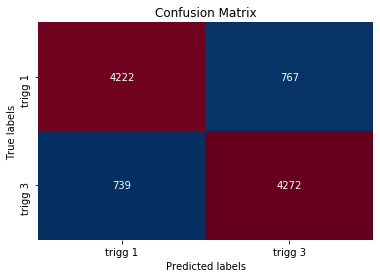

In [81]:
ax= plt.subplot()
sn.heatmap(confusion_matrix(y_true, y_pred), 
           annot=True, fmt='g', cmap=cm.RdBu_r, ax = ax, cbar=False)

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['trigg 1', 'trigg 3']); ax.yaxis.set_ticklabels(['trigg 1', 'trigg 3']);